# Пример использования алгоритмов снижения размерности (PSA и T-sne)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


In [ ]:
import numpy as np
X, y_name_str = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_name = le.fit_transform(y_name_str)
y_name

array([ 0,  0,  0, ..., 99, 99, 99])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_name, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(1200, 64) (400, 64)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca.fit(X)

X_redused = pca.transform(X)
X_redused

array([[-0.03307489,  0.02892331],
       [-0.02422727,  0.01839179],
       [-0.02629431,  0.03441262],
       ...,
       [-0.06300588, -0.05859334],
       [-0.03770296, -0.05299064],
       [-0.03348526, -0.03997298]])

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

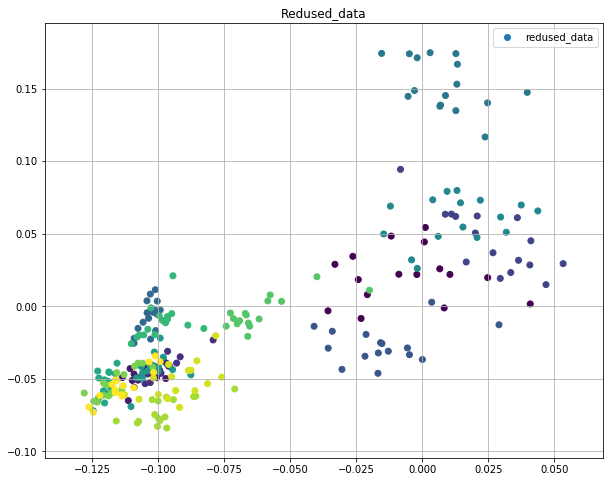

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

X_redused_filtered = X_redused[np.where(y_name <= 15)[0]]

plt.rcParams["figure.figsize"] = (10,8)
fig, ax = plt.subplots()

ax.set(title = 'Redused_data')
ax.scatter(X_redused_filtered[:, 0], X_redused_filtered[:, 1], label = "redused_data", c = y_name[y_name <= 15])

ax.legend()
ax.grid()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_redused_tsne = tsne.fit_transform(X)
X_redused_tsne

array([[ -6.0251646, -15.01907  ],
       [  1.3780085, -12.053386 ],
       [  2.5172641, -12.290286 ],
       ...,
       [-28.517841 , -20.599089 ],
       [-26.831848 , -20.774233 ],
       [-26.708363 , -19.772482 ]], dtype=float32)

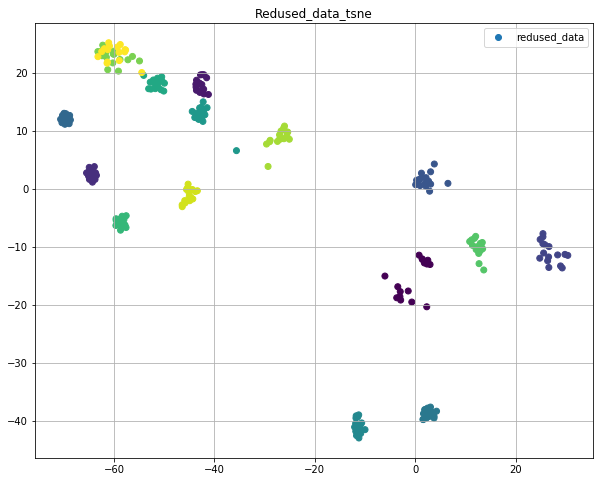

In [ ]:
X_redused_filtered = X_redused_tsne[np.where(y_name <= 15)[0]]

plt.rcParams["figure.figsize"] = (10,8)
fig, ax = plt.subplots()

ax.set(title = 'Redused_data_tsne')
ax.scatter(X_redused_filtered[:, 0], X_redused_filtered[:, 1], label = "redused_data", c = y_name[y_name <= 15])

ax.legend()
ax.grid()
plt.show()